In [32]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import concat, col, lit, year, count, to_date, month
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
spark =SparkSession.builder.appName('Crime_LA_Data').getOrCreate()

23/07/31 19:14:04 WARN Utils: Your hostname, Oscars-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.56.191 instead (on interface en0)
23/07/31 19:14:04 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/07/31 19:14:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
spark

In [4]:
df_pyspark=spark.read.option('header','true').csv('Crime_Data_LA.csv',inferSchema=True)

In [5]:
df_pyspark.head()

23/07/31 19:14:11 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Row(DR_NO=211312046, Date Rptd=datetime.date(2021, 7, 1), DATE OCC='07/01/2021 12:00:00 AM', TIME OCC=1624, AREA=13, AREA NAME='Newton', Rpt Dist No=1351, Part 1-2=1, Crm Cd=210, Crm Cd Desc='ROBBERY', Mocodes='0344 0325 1822 0945 0431', Vict Age=0, Vict Sex='M', Vict Descent='W', Premis Cd=203.0, Premis Desc='OTHER BUSINESS', Weapon Used Cd=503.0, Weapon Desc='CAUSTIC CHEMICAL/POISON', Status='IC', Status Desc='Invest Cont', Crm Cd 1=210.0, Crm Cd 2=None, Crm Cd 3=None, Crm Cd 4=None, LOCATION='4000 S  MAIN                         ST', Cross Street=None, LAT=34.0075, LON=-118.2775)

In [6]:
print('Number of rows:',df_pyspark.count())

Number of rows: 225873


In [7]:
print('Schema:')
df_pyspark.printSchema()

Schema:
root
 |-- DR_NO: integer (nullable = true)
 |-- Date Rptd: date (nullable = true)
 |-- DATE OCC: string (nullable = true)
 |-- TIME OCC: integer (nullable = true)
 |-- AREA: integer (nullable = true)
 |-- AREA NAME: string (nullable = true)
 |-- Rpt Dist No: integer (nullable = true)
 |-- Part 1-2: integer (nullable = true)
 |-- Crm Cd: integer (nullable = true)
 |-- Crm Cd Desc: string (nullable = true)
 |-- Mocodes: string (nullable = true)
 |-- Vict Age: integer (nullable = true)
 |-- Vict Sex: string (nullable = true)
 |-- Vict Descent: string (nullable = true)
 |-- Premis Cd: double (nullable = true)
 |-- Premis Desc: string (nullable = true)
 |-- Weapon Used Cd: double (nullable = true)
 |-- Weapon Desc: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Status Desc: string (nullable = true)
 |-- Crm Cd 1: double (nullable = true)
 |-- Crm Cd 2: double (nullable = true)
 |-- Crm Cd 3: double (nullable = true)
 |-- Crm Cd 4: double (nullable = true)
 |-- L

In [8]:
df_pyspark.dtypes

[('DR_NO', 'int'),
 ('Date Rptd', 'date'),
 ('DATE OCC', 'string'),
 ('TIME OCC', 'int'),
 ('AREA', 'int'),
 ('AREA NAME', 'string'),
 ('Rpt Dist No', 'int'),
 ('Part 1-2', 'int'),
 ('Crm Cd', 'int'),
 ('Crm Cd Desc', 'string'),
 ('Mocodes', 'string'),
 ('Vict Age', 'int'),
 ('Vict Sex', 'string'),
 ('Vict Descent', 'string'),
 ('Premis Cd', 'double'),
 ('Premis Desc', 'string'),
 ('Weapon Used Cd', 'double'),
 ('Weapon Desc', 'string'),
 ('Status', 'string'),
 ('Status Desc', 'string'),
 ('Crm Cd 1', 'double'),
 ('Crm Cd 2', 'double'),
 ('Crm Cd 3', 'double'),
 ('Crm Cd 4', 'double'),
 ('LOCATION', 'string'),
 ('Cross Street', 'string'),
 ('LAT', 'double'),
 ('LON', 'double')]

In [9]:
df_pyspark.show()

+---------+----------+--------------------+--------+----+-----------+-----------+--------+------+--------------------+--------------------+--------+--------+------------+---------+--------------------+--------------+--------------------+------+------------+--------+--------+--------+--------+--------------------+------------+-------+---------+
|    DR_NO| Date Rptd|            DATE OCC|TIME OCC|AREA|  AREA NAME|Rpt Dist No|Part 1-2|Crm Cd|         Crm Cd Desc|             Mocodes|Vict Age|Vict Sex|Vict Descent|Premis Cd|         Premis Desc|Weapon Used Cd|         Weapon Desc|Status| Status Desc|Crm Cd 1|Crm Cd 2|Crm Cd 3|Crm Cd 4|            LOCATION|Cross Street|    LAT|      LON|
+---------+----------+--------------------+--------+----+-----------+-----------+--------+------+--------------------+--------------------+--------+--------+------------+---------+--------------------+--------------+--------------------+------+------------+--------+--------+--------+--------+---------------

In [10]:
#Show area and Area name
df_pyspark.select(['AREA','AREA NAME']).show()

+----+-----------+
|AREA|  AREA NAME|
+----+-----------+
|  13|     Newton|
|   8|    West LA|
|  18|  Southeast|
|   2|    Rampart|
|   3|  Southwest|
|   9|   Van Nuys|
|  14|    Pacific|
|   4| Hollenbeck|
|  19|    Mission|
|  16|   Foothill|
|  16|   Foothill|
|  19|    Mission|
|  16|   Foothill|
|  18|  Southeast|
|   4| Hollenbeck|
|  16|   Foothill|
|  11|  Northeast|
|  14|    Pacific|
|   8|    West LA|
|  10|West Valley|
+----+-----------+
only showing top 20 rows



In [11]:
#Create a new column to have full area name (code and area name)
df_pyspark=df_pyspark.withColumn("FULL AREA NAME",concat(col("AREA"),lit("_"),col("AREA NAME")))

#Drop some columns I will not use
columns_to_drop = ["DR_NO", 'Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4','Premis Cd','Crm Cd','Weapon Used Cd','Cross Street','Part 1-2','Mocodes','Status','AREA','AREA NAME','Vict Descent']
df_pyspark = df_pyspark.drop(*columns_to_drop)
df_pyspark.head()


Row(Date Rptd=datetime.date(2021, 7, 1), DATE OCC='07/01/2021 12:00:00 AM', TIME OCC=1624, Rpt Dist No=1351, Crm Cd Desc='ROBBERY', Vict Age=0, Vict Sex='M', Premis Desc='OTHER BUSINESS', Weapon Desc='CAUSTIC CHEMICAL/POISON', Status Desc='Invest Cont', LOCATION='4000 S  MAIN                         ST', LAT=34.0075, LON=-118.2775, FULL AREA NAME='13_Newton')

In [12]:
#Show area values
df_pyspark.select("FULL AREA NAME").distinct().show()

+--------------+
|FULL AREA NAME|
+--------------+
|12_77th Street|
|    9_Van Nuys|
|15_N Hollywood|
| 17_Devonshire|
|  11_Northeast|
|   6_Hollywood|
|    7_Wilshire|
|  18_Southeast|
|   3_Southwest|
|   16_Foothill|
|  4_Hollenbeck|
|      5_Harbor|
|    19_Mission|
|    14_Pacific|
|    21_Topanga|
|    20_Olympic|
|     13_Newton|
|10_West Valley|
|     8_West LA|
|     1_Central|
+--------------+
only showing top 20 rows



In [13]:
df_pyspark= df_pyspark.withColumnRenamed('FULL AREA NAME','AREA')

In [14]:
df_pyspark.show()

+----------+--------------------+--------+-----------+--------------------+--------+--------+--------------------+--------------------+------------+--------------------+-------+---------+--------------+
| Date Rptd|            DATE OCC|TIME OCC|Rpt Dist No|         Crm Cd Desc|Vict Age|Vict Sex|         Premis Desc|         Weapon Desc| Status Desc|            LOCATION|    LAT|      LON|          AREA|
+----------+--------------------+--------+-----------+--------------------+--------+--------+--------------------+--------------------+------------+--------------------+-------+---------+--------------+
|2021-07-01|07/01/2021 12:00:...|    1624|       1351|             ROBBERY|       0|       M|      OTHER BUSINESS|CAUSTIC CHEMICAL/...| Invest Cont|4000 S  MAIN     ...|34.0075|-118.2775|     13_Newton|
|2023-03-27|03/25/2023 12:00:...|    2000|        855|    VEHICLE - STOLEN|       0|    null|              STREET|                null| Invest Cont|1600    GREENFIEL...|34.0507| -118.443| 

In [15]:
#Check for nulls on some fields I will use for charts
null_rows_df = df_pyspark.filter(col("Date Rptd").isNull() | col("DATE OCC").isNull() | col("TIME OCC").isNull() | col("DATE OCC").isNull() 
                         | col("TIME OCC").isNull()| col("Rpt Dist No").isNull() | col("Crm Cd Desc").isNull() | col("Vict Age").isNull() 
                         | col("Status Desc").isNull() | col("LOCATION").isNull() | col("LAT").isNull() | col("LON").isNull() | col("AREA").isNull())

# Show the result
print('Rows to deal with null values: ',null_rows_df.count())
null_rows_df.show()

Rows to deal with null values:  0
+---------+--------+--------+-----------+-----------+--------+--------+-----------+-----------+-----------+--------+---+---+----+
|Date Rptd|DATE OCC|TIME OCC|Rpt Dist No|Crm Cd Desc|Vict Age|Vict Sex|Premis Desc|Weapon Desc|Status Desc|LOCATION|LAT|LON|AREA|
+---------+--------+--------+-----------+-----------+--------+--------+-----------+-----------+-----------+--------+---+---+----+
+---------+--------+--------+-----------+-----------+--------+--------+-----------+-----------+-----------+--------+---+---+----+



In [16]:
df_pyspark.count()

225873

In [17]:
#Show different values for Vict Sex
df_pyspark.select("Vict Sex").distinct().show()

+--------+
|Vict Sex|
+--------+
|       F|
|    null|
|       M|
|       X|
|       H|
+--------+



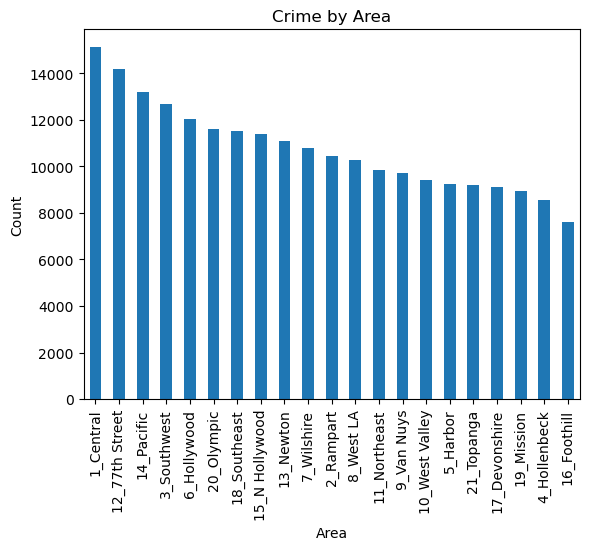

In [18]:
grouped_df = df_pyspark.groupBy("AREA").count()

pandas_df = grouped_df.toPandas()
pandas_df = pandas_df.sort_values(by='count', ascending=False)
pandas_df.plot(kind='bar', x='AREA', y='count', legend=False)
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Crime by Area')
plt.show()

In [19]:
# Convert the 'Date Rptd' column to a DateType column (assuming it's in a consistent format)
df_pyspark=df_pyspark.withColumn("Date Reported", to_date(df_pyspark["Date Rptd"], "MM/dd/yyyy hh:mm:ss a"))

In [20]:
df_pyspark = df_pyspark.drop("Date Rptd")

<Figure size 640x480 with 0 Axes>

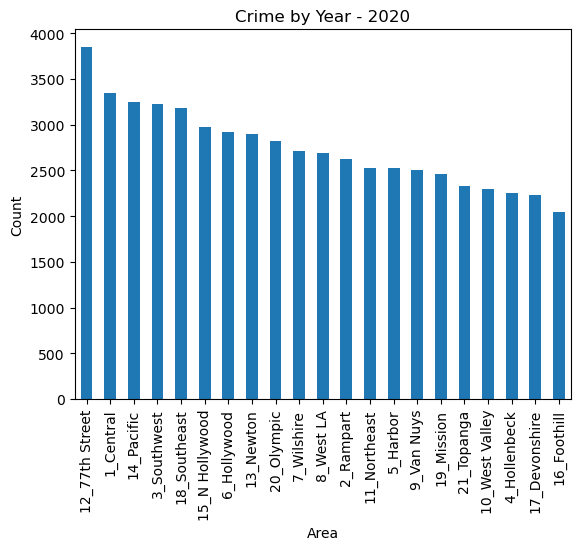

<Figure size 640x480 with 0 Axes>

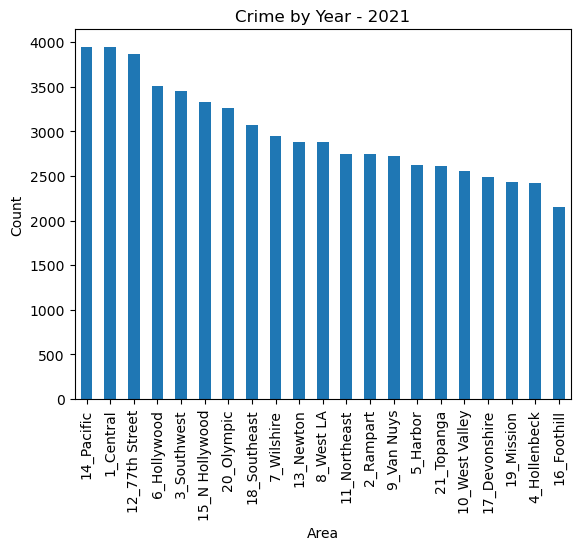

<Figure size 640x480 with 0 Axes>

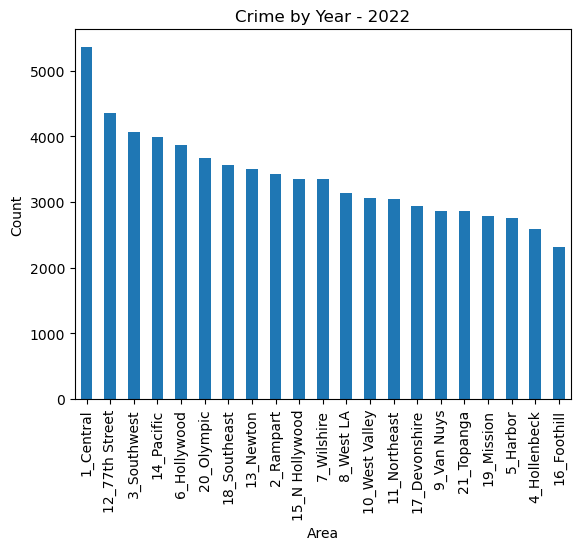

<Figure size 640x480 with 0 Axes>

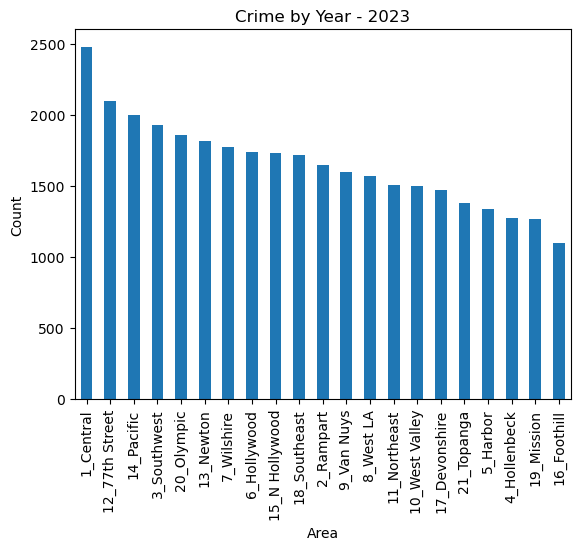

In [21]:
### Let's see crime by year

# Extract the year from the 'Date Rerported' column
df_with_year = df_pyspark.withColumn("Year", year(df_pyspark["Date Reported"]))

# Group by 'Year' and 'AREA', count occurrences
grouped_df = df_with_year.groupBy("Year", "AREA").agg(count("*").alias("count"))

# Convert the result to a Pandas DataFrame
pandas_df = grouped_df.toPandas()
pandas_df = pandas_df.sort_values(by='Year', ascending=True)

# Plot the bar chart for each year
years = pandas_df["Year"].unique()
for year in years:
    filtered_df = pandas_df[pandas_df["Year"] == year]
    filtered_df = filtered_df.sort_values(by='count', ascending=False)
    plt.figure()
    filtered_df.plot(kind='bar', x='AREA', y='count', legend=False)
    plt.xlabel('Area')
    plt.ylabel('Count')
    plt.title(f'Crime by Year - {year}')
    plt.show()

#Free some memory
del df_with_year
del grouped_df
del pandas_df

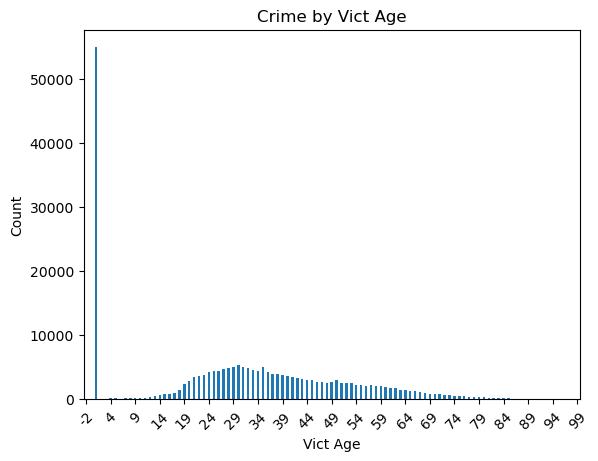

In [22]:
### Let's see crime by Age

grouped_df = df_pyspark.groupBy("Vict Age").count()

pandas_df = grouped_df.toPandas()
pandas_df = pandas_df.sort_values(by='Vict Age', ascending=True)


ax = pandas_df.plot(kind='bar', x='Vict Age', y='count', legend=False)
plt.xlabel('Vict Age')
plt.ylabel('Count')
plt.title('Crime by Vict Age')

# Rotate X-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Adjust the rotation angle as needed

# Reduce number of X-axis ticks
step = 5  # Show every 5th tick
ax.set_xticks(np.arange(0, len(pandas_df), step))

plt.show()

<Figure size 800x600 with 0 Axes>

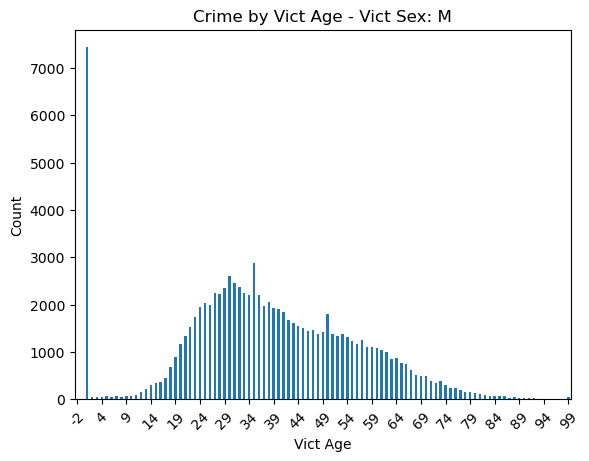

<Figure size 800x600 with 0 Axes>

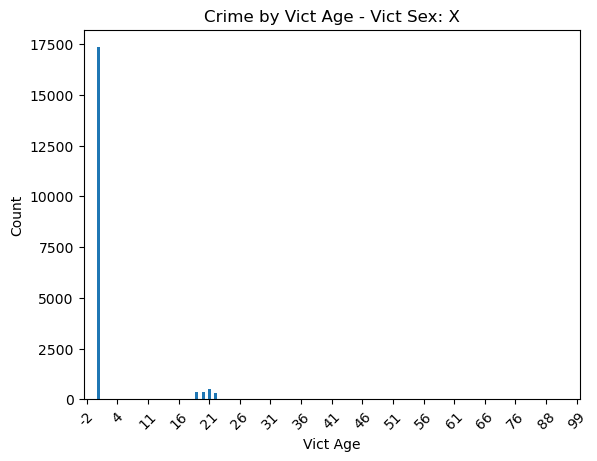

<Figure size 800x600 with 0 Axes>

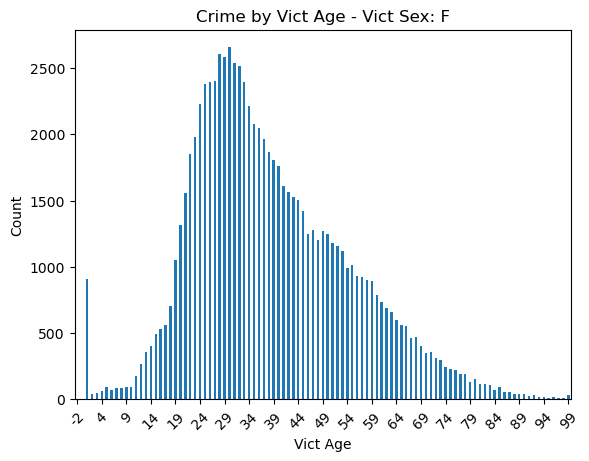

No data found for Vict Sex: None


<Figure size 800x600 with 0 Axes>

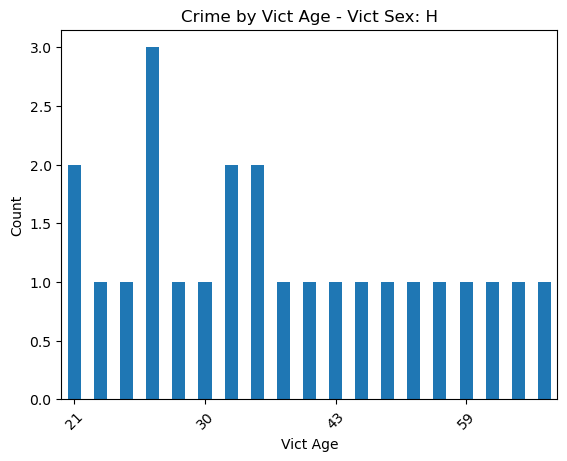

In [23]:
# Group by 'Vict Age' and 'Vict Sex', count occurrences
grouped_df = df_pyspark.groupBy("Vict Age", "Vict Sex").count()

# Convert the result to a Pandas DataFrame
pandas_df = grouped_df.toPandas()

# Sort the DataFrame by 'Vict Age' in ascending order
pandas_df = pandas_df.sort_values(by='Vict Age', ascending=True)

# Get unique values of 'Vict Sex'
unique_sex_values = pandas_df["Vict Sex"].unique()

# Iterate over unique 'Vict Sex' values and plot a chart for each
for sex_value in unique_sex_values:
    filtered_df = pandas_df[pandas_df["Vict Sex"] == sex_value]
    
    # Check if there are any rows for the current 'Vict Sex' value
    if not filtered_df.empty:
        plt.figure(figsize=(8, 6))
        ax = filtered_df.plot(kind='bar', x='Vict Age', y='count', legend=False)
        plt.xlabel('Vict Age')
        plt.ylabel('Count')
        plt.title(f'Crime by Vict Age - Vict Sex: {sex_value}')
        
        # Rotate X-axis labels
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Adjust the rotation angle as needed
        
        # Reduce number of X-axis ticks
        step = 5  # Show every 5th tick
        ax.set_xticks(np.arange(0, len(filtered_df), step))
        
        plt.show()
    else:
        print(f"No data found for Vict Sex: {sex_value}")

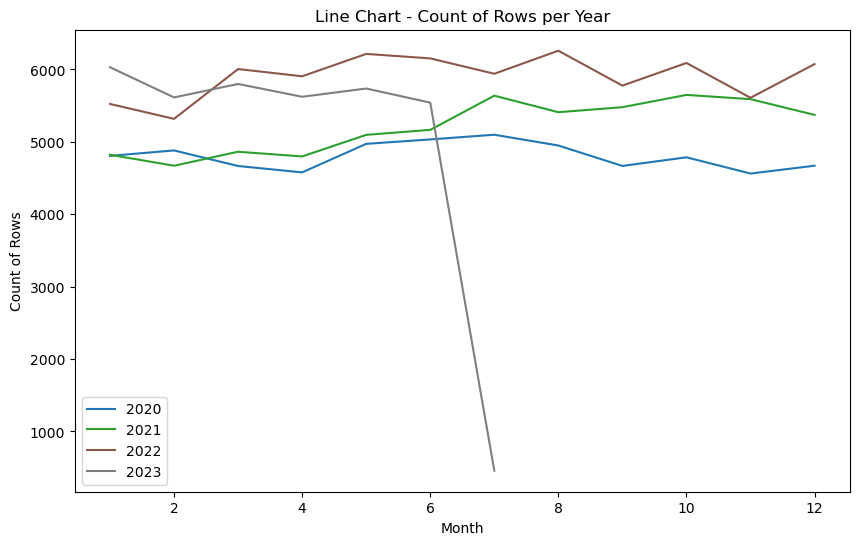

In [33]:
#Let's see if crime is seasonal -> plot crime # by month for each year

df = df_pyspark.withColumn('Year', year('Date Reported'))
df = df.withColumn('Month', month('Date Reported'))

# Group by Year and Month, and get the count of rows
grouped_df = df.groupBy('Year', 'Month').count().orderBy('Year', 'Month')

# Convert to Pandas DataFrame for plotting
pandas_df = grouped_df.toPandas()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Color map for lines
cmap = plt.get_cmap('tab10')
num_years = len(pandas_df['Year'].unique())

for i, year in enumerate(pandas_df['Year'].unique()):
    year_data = pandas_df[pandas_df['Year'] == year]
    ax.plot(year_data['Month'], year_data['count'], label=str(year), color=cmap(i / num_years))

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Crime Count')
ax.set_title('Crime Count per Month, split by Year')

# Show the legend
ax.legend()

# Show the plot
plt.show()

In [40]:
#Lets free some space before saving
%reset -f